In [71]:
import os
import pandas as pd
import IPython.display as ipd
# import librosa
# import librosa.display
import music21
from musicir.rhythm.generate import Euclid, RhythmViewer
from musicir.rhythm import generate 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
import copy
import glob
import random

In [2]:
semitons = lista = list(range(0,12))
semitons.extend(list(range(0,12)))
semitons

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [3]:
notes = ['C','Db','D','Eb','E','F','Gb','G','Ab','A','Bb','B']
# notes = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']
notes

['C', 'Db', 'D', 'Eb', 'E', 'F', 'Gb', 'G', 'Ab', 'A', 'Bb', 'B']

In [4]:
E= Euclid(3,8)

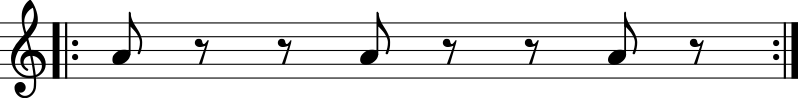

In [5]:
E.beat.show()

In [57]:
# criando um dicionário com cada ritmo e seu respectivo número de articulações
ritmos_dict = {}
for rhy in generate.traditional_rhythms.items():
    notas = rhy[1].beat[0].notes
    ritmos_dict[rhy[0]] =  len(notas)
    
ritmos_dict

{'fandango': 4,
 'cueca': 2,
 'khafif-e-ramal': 2,
 'cumbia': 3,
 'calypso': 3,
 'khalif-e-saghil': 3,
 'khafif-e-ramal_2': 3,
 'ruchenitza': 3,
 'tresillo': 3,
 'ruchenitza_2': 4,
 'aksak': 4,
 'outside_now': 4,
 'york-samai': 5,
 'Nawakhat': 5,
 'cinquillo': 5,
 'spanish_tango': 5,
 'al-saghil-al-sani': 5,
 'agsag-samai': 5,
 'venda': 5,
 'pictures_at_an_exhibition': 5,
 'venda_clapping': 5,
 'bossa-nova': 5,
 'bendir': 7,
 'mpre': 7,
 'samba': 7,
 'agogo-samba': 9,
 'ngbaka-maibo': 9,
 'aka': 11,
 'aka_upper_sangha': 13}

In [60]:
# deletaremos os ritmos que têm menos de 4 articulações
del_ritmos = [ritmo for ritmo, n_ataques in ritmos_dict.items() if n_ataques < 4]
del_ritmos

['cueca',
 'khafif-e-ramal',
 'cumbia',
 'calypso',
 'khalif-e-saghil',
 'khafif-e-ramal_2',
 'ruchenitza',
 'tresillo']

Aqui, vamos testar trocar as notas que aparecem no objeto do tipo Euclid, que é derivado de um stream do music21.

G4 G
B4 B
D5 D
Gb5 G flat


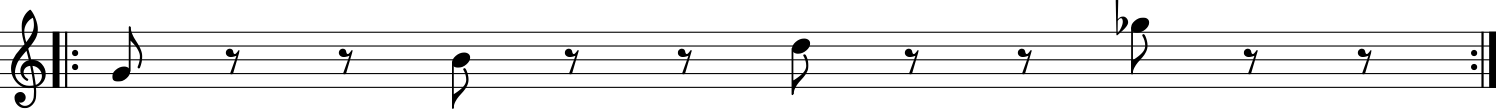

In [75]:
# criando um objeto stream com o ritmo que usaremos
stream1 = generate.traditional_rhythms['fandango'].beat

# definindo cada nota do acorde a partir dos intervalos, em semitons
fundamental = 0 + 7
terca = fundamental + 4
quinta = fundamental + 7
setima = fundamental + 11

# mapeando cada nota do acorde a partir da sua distância (em semitons) da nota dó
i_C = semitons[fundamental]
i_E = semitons[terca]
i_G = semitons[quinta]
i_B = semitons[setima]


# criando um dicionário, em que a chave é a distância em semitons do dó e o valor é seu nome, como string
acorde_dict = {i_C:notes[i_C], 
               i_E:notes[i_E], 
               i_G:notes[i_G], 
               i_B:notes[i_B]}


# aqui, tratamos a questão das oitavas. terça, quinta e sétima precisam ser sempre mais agudas que a fundamental
semitom_fundamental = i_C
for key, value in acorde_dict.items():
    if key < semitom_fundamental:
        acorde_dict[key] = value + '5'
        
    else:
        acorde_dict[key] = value + '4'

acorde_list = []
for key, value in acorde_dict.items():
    acorde_list.append(value)


    
# alterando as notas do nosso stream, para serem iguais às notas do acorde
counter = 0
for element in stream1[0]:
    if type(element) == music21.note.Note:
        
        nota_nova = acorde_list[counter]
        
        note_name = nota_nova[0] 
        note_octave = nota_nova[-1]

        element.step = note_name
        element.pitch.octave = note_octave
        
        # tratando o problema com bemóis
        if 'b' in nota_nova:
            element.pitch.accidental = '-'
            print(nota_nova, element.step, element.pitch.accidental)
            
        else:            
#             element.step = nota_nova
            element.pitch.accidental = 'natural'
            print(nota_nova, element.step)
            
        counter += 1

stream1.show()

### Ritmos euclidianos com mais de 4 articulações

In [98]:
ritmos = {ritmo: n_ataques for ritmo, n_ataques in ritmos_dict.items() if n_ataques >= 4}
ritmos

{'fandango': 4,
 'ruchenitza_2': 4,
 'aksak': 4,
 'outside_now': 4,
 'york-samai': 5,
 'Nawakhat': 5,
 'cinquillo': 5,
 'spanish_tango': 5,
 'al-saghil-al-sani': 5,
 'agsag-samai': 5,
 'venda': 5,
 'pictures_at_an_exhibition': 5,
 'venda_clapping': 5,
 'bossa-nova': 5,
 'bendir': 7,
 'mpre': 7,
 'samba': 7,
 'agogo-samba': 9,
 'ngbaka-maibo': 9,
 'aka': 11,
 'aka_upper_sangha': 13}

In [68]:
ritmos_dict

{'fandango': 4,
 'cueca': 2,
 'khafif-e-ramal': 2,
 'cumbia': 3,
 'calypso': 3,
 'khalif-e-saghil': 3,
 'khafif-e-ramal_2': 3,
 'ruchenitza': 3,
 'tresillo': 3,
 'ruchenitza_2': 4,
 'aksak': 4,
 'outside_now': 4,
 'york-samai': 5,
 'Nawakhat': 5,
 'cinquillo': 5,
 'spanish_tango': 5,
 'al-saghil-al-sani': 5,
 'agsag-samai': 5,
 'venda': 5,
 'pictures_at_an_exhibition': 5,
 'venda_clapping': 5,
 'bossa-nova': 5,
 'bendir': 7,
 'mpre': 7,
 'samba': 7,
 'agogo-samba': 9,
 'ngbaka-maibo': 9,
 'aka': 11,
 'aka_upper_sangha': 13}

In [125]:
ritmo_teste = 'samba'
n_ataques = ritmos_dict[ritmo_teste]

stream_teste = generate.traditional_rhythms[ritmo_teste].beat

# definindo cada nota do acorde a partir dos intervalos, em semitons
fundamental = 0 + 8
terca = fundamental + 4
quinta = fundamental + 7
setima = fundamental + 11

# mapeando cada nota do acorde a partir da sua distância (em semitons) da nota dó
i_C = semitons[fundamental]
i_E = semitons[terca]
i_G = semitons[quinta]
i_B = semitons[setima]


# criando um dicionário, em que a chave é a distância em semitons do dó e o valor é seu nome, como string
acorde_dict = {i_C:notes[i_C], 
               i_E:notes[i_E], 
               i_G:notes[i_G], 
               i_B:notes[i_B]}


# aqui, tratamos a questão das oitavas. terça, quinta e sétima precisam ser sempre mais agudas que a fundamental
semitom_fundamental = i_C
for key, value in acorde_dict.items():
    if key < semitom_fundamental:
        acorde_dict[key] = value + '5'
        
    else:
        acorde_dict[key] = value + '4'

acorde_list = []
for key, value in acorde_dict.items():
    acorde_list.append(value)
    

# amostrando aleatoriamente as notas que faltam pra completar a quantidade de ataques
# ex.: se temos 7 ataques no ritmo, amostraremos 7 - 4 = 3 notas
# obs.: as notas extra precisam ser pertencentes ao acorde em questão

notas_extra = np.random.choice(acorde_list, 
                               size=n_ataques - 4, 
                               replace=True)

acorde_list.extend(notas_extra)



# Flavio pediu pra fundamental durar o compasso todo
durations = []
for element in stream_teste[0]:
    durations.append(element.duration.quarterLength)
    print(element, element.duration.quarterLength)
    
duration_fund = sum(durations)



# alterando as notas do nosso stream, para serem iguais às notas do acorde
counter = 0
for element in stream_teste[0]:
    if type(element) == music21.note.Note:
        
        nota_nova = acorde_list[counter]
        
        note_name = nota_nova[0] 
        note_octave = nota_nova[-1]

        element.step = note_name
        element.pitch.octave = note_octave
        
        # tratando o problema com bemóis
        if 'b' in nota_nova:
            element.pitch.accidental = '-'
            print(nota_nova, element.step, element.pitch.accidental)
            
        else:            
#             element.step = nota_nova
            element.pitch.accidental = 'natural'
            print(nota_nova, element.step)
        
        
        if counter == 0:
            element.duration = music21.duration.Duration(duration_fund)
            element.pitch.octave = 2
        
        
        counter += 1

stream_teste.show('midi')

<music21.bar.Repeat direction=start> 0.0
<music21.note.Note F> 0.5
<music21.note.Rest eighth> 0.5
<music21.note.Note A> 0.5
<music21.note.Rest eighth> 0.5
<music21.note.Rest eighth> 0.5
<music21.note.Note C> 0.5
<music21.note.Rest eighth> 0.5
<music21.note.Note E> 0.5
<music21.note.Rest eighth> 0.5
<music21.note.Note A> 0.5
<music21.note.Rest eighth> 0.5
<music21.note.Rest eighth> 0.5
<music21.note.Note C> 0.5
<music21.note.Rest eighth> 0.5
<music21.note.Note E> 0.5
<music21.note.Rest eighth> 0.5
<music21.bar.Repeat direction=end times=2> 0.0
Ab4 A flat
C5 C
Eb5 E flat
G5 G
C5 C
Ab4 A flat
Ab4 A flat


In [114]:
durations = []
for element in stream_teste[0]:
    durations.append(element.duration.quarterLength)
    print(element, element.duration.quarterLength)


<music21.bar.Repeat direction=start> 0.0
<music21.note.Note F> 0.5
<music21.note.Rest eighth> 0.5
<music21.note.Note A> 0.5
<music21.note.Rest eighth> 0.5
<music21.note.Note C> 0.5
<music21.note.Rest eighth> 0.5
<music21.note.Note E> 0.5
<music21.note.Rest eighth> 0.5
<music21.note.Note C> 0.5
<music21.bar.Repeat direction=end times=2> 0.0


In [117]:
sum(durations)

4.5

In [85]:
n_ataques - 4

5

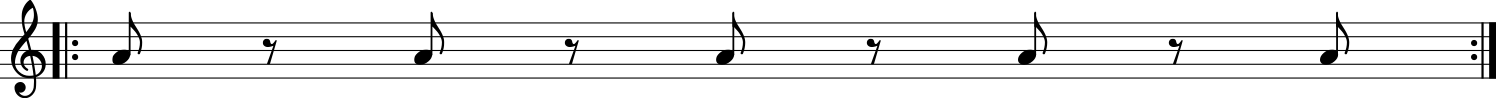

In [101]:
generate.traditional_rhythms['agsag-samai'].beat.show()

### 22/09
Uhul! Conseguimos gerar os acordes com ritmo euclidiano para ritmos com 4 articulações. Próximo passo é conseguir fazê-lo para ritmos com mais articulações, amostrando aleatoriamente notas do próprio acorde para compensar os ataques que faltarem. 
Pendência: questão das oitavas. Ex.: num acorde de E7M (mi, sol#, si, ré#), a sétima deverá aparecer numa oitava diferente do resto, pois se não será mais grave do que a fundamental. Como generalizar esta conta para todos os acordes?

Alterar duração da fundamental do acorde, para durar o compasso todo.

In [41]:
fundamental = 0 + 4
terca = fundamental + 4
quinta = fundamental + 7
setima = fundamental + 11

i_C = semitons[fundamental]
i_E = semitons[terca]
i_G = semitons[quinta]
i_B = semitons[setima]


acorde_list = [notes[i_C], 
               notes[i_E], 
               notes[i_G], 
               notes[i_B]]


s = music21.converter.parse('tinyNotation: 4/4 {} {} {} {} '.format(acorde_list[0],  
                                                                           acorde_list[1], acorde_list[2], 
                                                                           acorde_list[3]))

s.show('midi')
# acorde = music21.chord.Chord(list(acorde_list), duration=d)

# midi_subfolder = '{}/{}/midi_original'.format(corpus_folder, 
#                                               chord_type)

# os.makedirs(midi_subfolder, 
#             exist_ok=True)  

# acorde_file_name = '{}/{}{}'.format(midi_subfolder, 
#                                        notes[i], 
#                                        chord_type)

# acorde_file = acorde_file_name + '.mid'

# acorde.write('midi', acorde_file)


# !timidity {acorde_file_name}.mid -Ow -o {acorde_file_name}.wav

# print(notes[i], acorde.pitches)
# print('---------------------------------')